# ML1: Data Analysis with historical financial data

The aim of this assignment is to be able to perform some basic prediction based on real-financial data in China. In the end, you will gain the ability to understand relationships between your input and output, by analysing statistical relationships of serveral variables.

### 0. Install necessary packages
Each device has different setup so it is the best to make sure we all have the same packages installed.

In [1]:
%%capture
!pip install sklearn
!pip install matplotlib
!pip install pandas
!pip install numpy

### Workflow example
In the next section, I will give you instructions, then you do all the execution. Here I will just present the workflow. For example, if I tell you to present a table of results, please write the code and then run the result. The output should show something.

### EX.1 Read the data and Plot the last price of the stock data
Hint: Use pandas package to read the csv file and use pandas internal plotting function

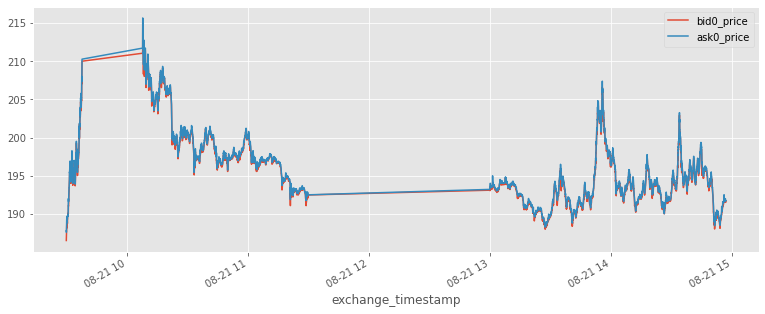

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

# Convertible Bond data 新莱转债
df = pd.read_csv('./SZE123037_20200821.csv', index_col=0)
df['exchange_timestamp'] = pd.to_datetime(df['exchange_timestamp'], errors='coerce')
df.set_index('exchange_timestamp', inplace=True)
df[['bid0_price', 'ask0_price']].plot(figsize=(13,5))

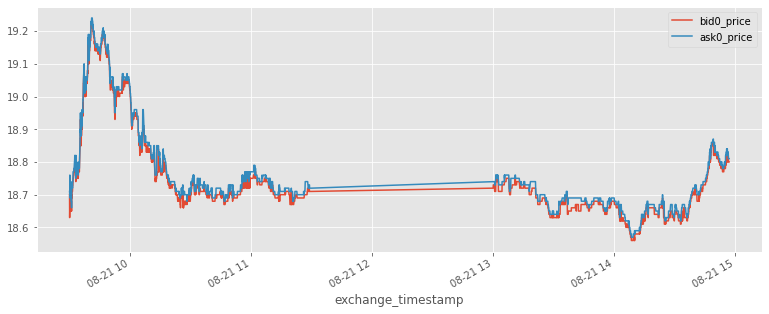

In [3]:
# Equity 新莱应材
df = pd.read_csv('./SZE300260_20200821.csv', index_col=0)
df['exchange_timestamp'] = pd.to_datetime(df['exchange_timestamp'], errors='coerce')
df.set_index('exchange_timestamp', inplace=True)
df[['bid0_price', 'ask0_price']].plot(figsize=(13,5))

## Your Turn!

### Q1. Print out all columns in the stock dataset and the shape of the dataset
Hint: Use pandas built in functions

In [ ]:
df = pd.read_csv('./SZE123037_20200821.csv', index_col=0)

# Your code here:
# print( ??? , ??? )

There are too many columns here, we are not ready to look at the full dataset for now. To simplify our analysis, let's choose only the columns we are interested for now.

As you can see right now, a real financial market data contains quite a lot of information. This also represents what a quantitative analyst do in their daily routine. To be a successful trader, oneself should be very careful when manipulate different kinds of data. 

In machine learning, there is 1 phrase you should know, "Garbage in Garbage out". That means, if your raw dataset is poor, then your analysis would be meaningless.

### EX2. Choose the columns we want and set index to exchange_timestamp
we want the followings to be our columns:
'instrument', 'exchange_timestamp', 'last_price', 'volume', 'turnover', 'volume_lot', 'cum_bid_qty', 'cum_ask_qty', 'bid0_price', 'bid0_qty', 'ask0_price', 'ask0_qty'

In [77]:
# Read the data
import pandas as pd
df = pd.read_csv('./SZE123037_20200821.csv', index_col=0)

# Create a subset of column name
cols = [
    'instrument', 'exchange_timestamp', 'last_price', 'volume', 'turnover', 'volume_lot',
    'cum_bid_qty', 'cum_ask_qty', 'bid0_price', 'bid0_qty', 'ask0_price', 'ask0_qty'
]
# Select them and save into the existing variable
df = df[cols]

# Convert times(Don't worry about it now)
df['exchange_timestamp'] = pd.to_datetime(df['exchange_timestamp'], errors='coerce')
df.set_index('exchange_timestamp', drop=True, inplace=True)
display(df)

,instrument,last_price,volume,turnover,volume_lot,cum_bid_qty,cum_ask_qty,bid0_price,bid0_qty,ask0_price,ask0_qty
exchange_timestamp,,,,,,,,,,,
2020-08-21 09:30:03,SZE123037,186.500,23630,4408140.090,234,20850,16910,186.500,10,187.777,720
2020-08-21 09:30:06,SZE123037,187.002,32310,6034359.970,344,45160,29060,187.002,840,187.577,300
2020-08-21 09:30:09,SZE123037,187.990,37570,7019662.820,405,56630,30210,187.605,60,187.990,540
2020-08-21 09:30:12,SZE123037,188.004,43720,8176492.820,460,62390,27520,188.006,80,188.987,60
2020-08-21 09:30:15,SZE123037,188.001,47780,8942462.760,500,64920,30630,188.820,1060,189.253,60
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-21 14:56:48,SZE123037,191.721,8917466,1769930264.184,76224,18870,60890,191.721,420,191.962,1080
2020-08-21 14:56:51,SZE123037,191.721,8918806,1770187396.474,76229,18100,60140,191.721,230,191.962,790
2020-08-21 14:56:54,SZE123037,191.710,8921006,1770609056.754,76250,16670,60210,191.700,390,191.710,80


Let me briefly talk about what does each attributes means:
- Instrument (SZE123037), exchange = Shenzhen stock exchange; 123037 = unique code for a tradable stock
- last_price: last traded price 
- volume: cumulative volume traded in shares
- turnover: total market capitalisation (cumulative traded price(t) * traded volume(t)) 
- cum_bid/ask_qty: cumulative bid/ask orders in queue
- bid/ask0_price/qty: current bid ask prices, shares in queue

In my example, I showed you the plot of the last traded price on a single day. It seems that there are quite a lot of movement to capture. Our strategy is simple, buy low sell high. The problem is what time should we buy or sell.

The workflow is straight forward:
1. Throw data into model
2. Train the model
3. When the model interpret a buy signal, buy the stock
4. Sell the stock after the movement, capitalizing price gain

In fact, making money out of this simple strategy requires a good model. It is not easy to make a good model. The job of a quant is to be able to observe any potential relationships in the market and transcribe it into a model.

### Q3. Return a summary statistics for each attributes
summary statistics: mean, standard deviation, min, max, (25%, 50%, 75%) percentile \
Hint: Use pandas built-in function

In [ ]:
# Your code here
# print( ??? )

By looking at these attributes, we can use a bit of brain power to play around to create meaningful features. As you must have read https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/. Sentdex actually explained how important is to create useful features for the model. 

- Can last_price predict the future? Can the past predict future? 
- How about we create some patterns for the model to follow? 

The more data does not mean the better model. Many scientist acutually spend good amount of time investigating new patterns in their life. 


### EX4. Create label(target)
Label is the varaible we want to predict.

Our label is next midprice change. The mid price change is defined as:$ M_t = (b_t + a_t) / 2 $ For this task, I have done some of them for you.

In [78]:
# Label :Predict the next price change
interval = -1
df['mid_price'] = df.eval('0.5 * (bid0_price + ask0_price)')
df['label'] = (df['mid_price'].shift(interval) - df['mid_price']).fillna(0)

### EX5. Create features (Advance)
Features are factors that contributes to the model. In mathematics, we called it the X. 

This part allows you to handcraft some features. Here I have done some examples for you. Please try to work with some maths and create 5 different features. Start from simple mathematical manipulation.

Many of the features are simply ratio, difference, spreads. This can easily capture relationships

In [79]:
# Here I did some processing on equity data set, more advance stuff
# equity and bond mid price difference
eq = pd.read_csv('./SZE300260_20200821.csv', index_col=0)
eq = eq[cols]
eq['exchange_timestamp'] = pd.to_datetime(eq['exchange_timestamp'], errors='coerce')
#eq.dropna(inplace=True)
eq.set_index('exchange_timestamp', drop=True, inplace=True)

# Merge 2 dataset
df = pd.merge_asof(df, eq, left_index=True, right_index=True, suffixes=('', '_equity'))

In [80]:
# Equity spread : midprice of convertible - midprice of equity
df.eval('mid_price_equity = 0.5 * (bid0_price_equity + ask0_price_equity)', inplace=True)
df.eval('equity_spread = mid_price - mid_price_equity', inplace=True)
df['diff__mid_price_equity'] = df['mid_price_equity'].diff()
df['diff__equity_spread']    = df['equity_spread'].diff()

# Volume change
df['diff_volume'] = df['volume'].diff()
df['ratio_diff_volume'] = df['diff_volume'] / df['volume']

# VWAP Convertible, VWAP Equity, spread
df.eval('vwap        = (bid0_price * bid0_qty + ask0_price * ask0_qty) / (bid0_qty + ask0_qty)', inplace=True)
df.eval('vwap_equity = (bid0_price_equity * bid0_qty_equity + ask0_price_equity * ask0_qty_equity) / (bid0_qty_equity + ask0_qty_equity)', inplace=True)
df.eval('vwap_spread = vwap - vwap_equity', inplace=True)

# VWAP differences
df['diff_vwap'] = df['vwap'].diff()
df['diff_vwap_equity'] = df['vwap_equity'].diff()
df['diff_vwap_spread'] = df['vwap_spread'].diff()

# Qty difference
df['diff_ask0_qty'] = df['ask0_qty'].diff()
df['diff_bid0_qty'] = df['bid0_qty'].diff()

### Q5. Create 5 different features
Hint: Add your new features into existing dataframe (df). You can achieve this by doing df['new_feature1'] = ...

In [ ]:
# Make features below
# Your code here ...
# df['new_feature1'] = ???
# df['new_feature2'] = ???
# ...

### EX6. Training and Testing

Now we can let our linearRegression model to interpret the result. To see how good is the quality of your features, we use a performance metric called the "score" to represent how good you are. The higher the score, the better mathmatician you are :)

In [102]:
from sklearn.linear_model    import LinearRegression
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics         import explained_variance_score

import numpy as np

# Remove NaN values
df.dropna(inplace=True)

# Create matrix for features
X_df = df.drop(['label','instrument', 'instrument_equity'], axis=1)
X    = np.array(df.drop(['label','instrument', 'instrument_equity'], axis=1))

# Create vector for label
y_df = df['label'] 
y    = np.array(df['label'])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2, shuffle=False)

# IMPORTANT! We fit the model on TRAINING SET! please check the fitting variable
model = LinearRegression(n_jobs=-1).fit(X_train, y_train)

# IMPORTANT! We produce our score on TESTING SET!
y_pred = model.predict(X_test)
print('The score is: ' + str(explained_variance_score(y_pred, y_test)))

# summarize feature importance
importance = model.coef_
cols = df.drop(['label','instrument', 'instrument_equity'], axis =1).columns.to_list()
importance = pd.DataFrame({'name': cols, 'importance': importance}).sort_values(by='importance', ascending=False)
pd.set_option('display.float_format', '{:.3f}'.format)
importance.head(10)

The score is: -2.488129778946961


,name,importance
17,bid0_price_equity,2.139
26,ratio_diff_volume,1.505
21,mid_price_equity,1.002
29,vwap_spread,0.480
6,bid0_price,0.344
10,mid_price,0.264
8,ask0_price,0.184
31,diff_vwap_equity,0.167
0,last_price,0.166
30,diff_vwap,0.109


Please try to complete the task I have given to you first. Then we will discuss the concept of modelling.

### EX7. Forecasting and Predicting


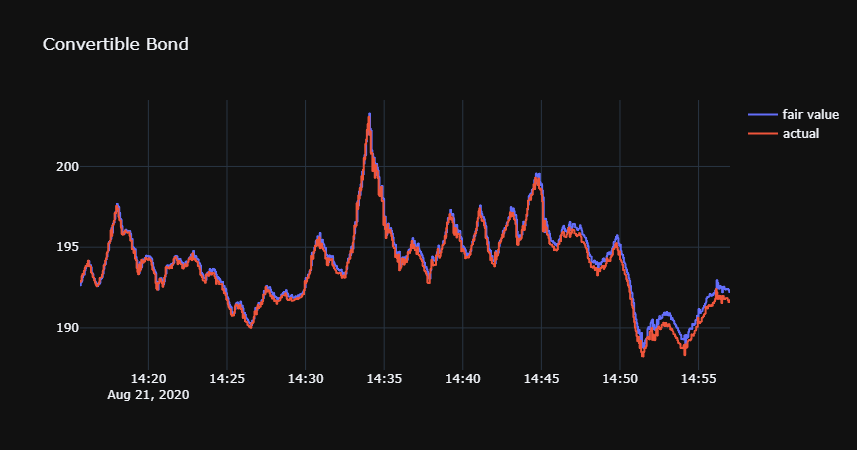

In [109]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
pio.templates.default = 'plotly_dark'

fig = go.Figure()
#fig.add_trace(go.Scattergl(x=X_df_test.index, y=X_df_test['bid0_price'], name="bid0", line_shape='hv', line=dict(color='green')))
#fig.add_trace(go.Scattergl(x=X_df_test.index, y=X_df_test['ask0_price'], name="ask0", line_shape='hv', line=dict(color='red')))
fig.add_trace(go.Scattergl(x=X_df_test.index, y=X_df_test['mid_price'] + y_pred, name="fair value", line_shape='hv'))
fig.add_trace(go.Scattergl(x=X_df_test.index, y=X_df_test['mid_price'] + y_df_test, name="actual", line_shape='hv'))

fig.update_layout(title_text='Convertible Bond',
                  xaxis_rangeslider_visible=False,
                  hovermode="x")
fig.update_traces(hoverinfo='text+name')

fig.show()